In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('train.csv')
df.isnull().sum()

#remove duplicates
df.drop_duplicates(inplace=True)
print(df)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave    66      Reg   
1        2          20       RL         80.0     9600   Pave    95      Reg   
2        3          60       RL         68.0    11250   Pave    33      IR1   
3        4          70       RL         60.0     9550   Pave    46      IR1   
4        5          60       RL         84.0    14260   Pave    69      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave    19      Reg   
1456  1457          20       RL         85.0    13175   Pave     5      Reg   
1457  1458          70       RL         66.0     9042   Pave    97      Reg   
1458  1459          20       RL         68.0     9717   Pave    82      Reg   
1459  1460          20       RL         75.0     9937   Pave     7      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [14]:

#To check how many null are in each column
missing_data=df.isnull().sum()
missing_colums=missing_data[missing_data>0]
print(missing_colums.sort_values(ascending=False))

Series([], dtype: int64)


In [13]:
#for each coumn ,find null and fill with randoms
for col in df.columns:
    null_mask=df[col].isnull()
    n_missing=null_mask.sum()
    if n_missing>0:
        #generate n_missing random values in[1,101]
        random_vals=np.random.randint(1,101,size=n_missing)
        #assign them back into dataframe
        df.loc[null_mask,col]=random_vals
#save back to csv 
df.to_csv('train.csv',index=False)

In [18]:
df.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,66,Reg,Lvl,AllPub,...,0,41,93,74,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,95,Reg,Lvl,AllPub,...,0,65,38,72,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,33,IR1,Lvl,AllPub,...,0,48,19,26,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,46,IR1,Lvl,AllPub,...,0,94,58,74,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,69,IR1,Lvl,AllPub,...,0,26,77,68,0,12,2008,WD,Normal,250000


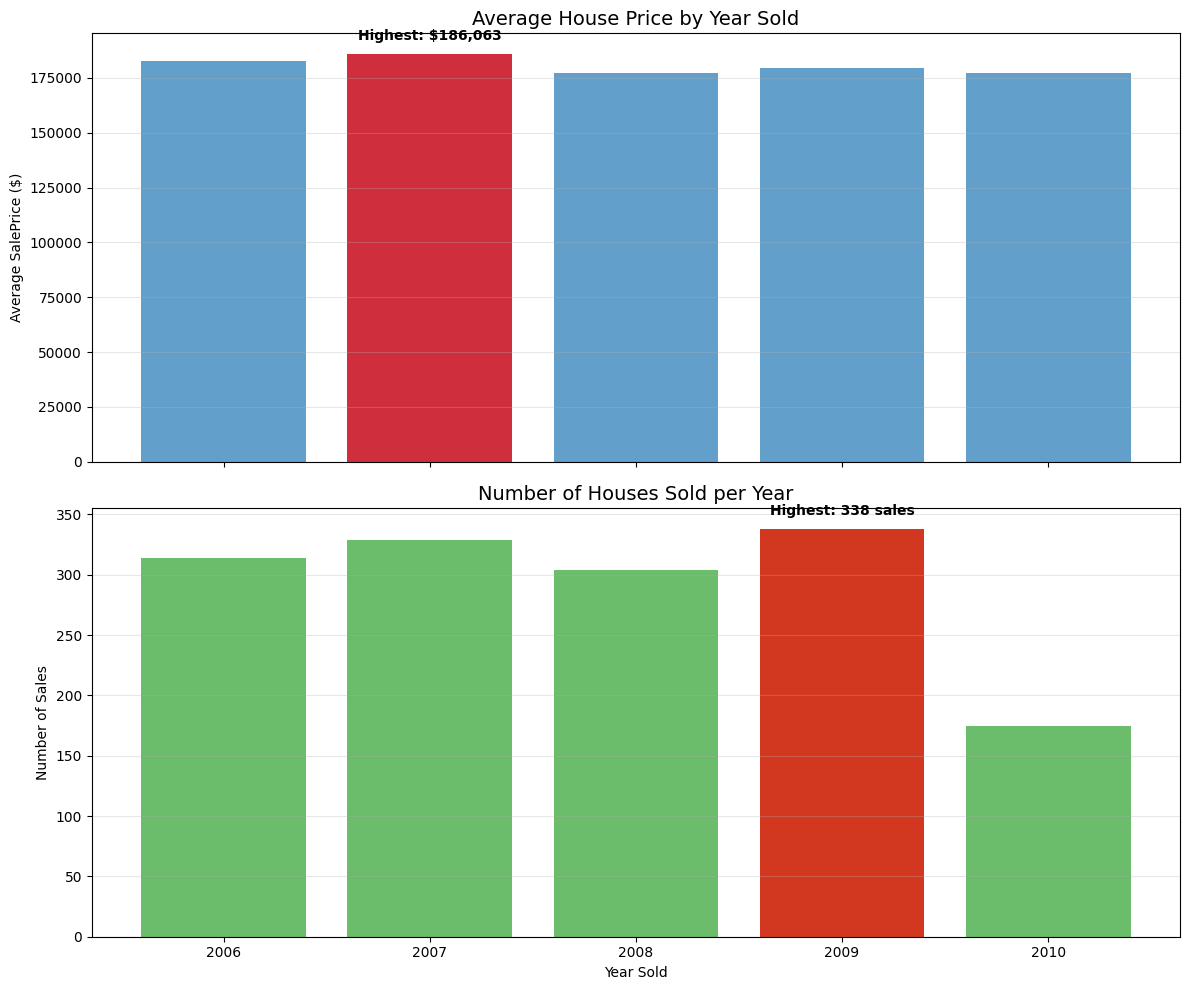

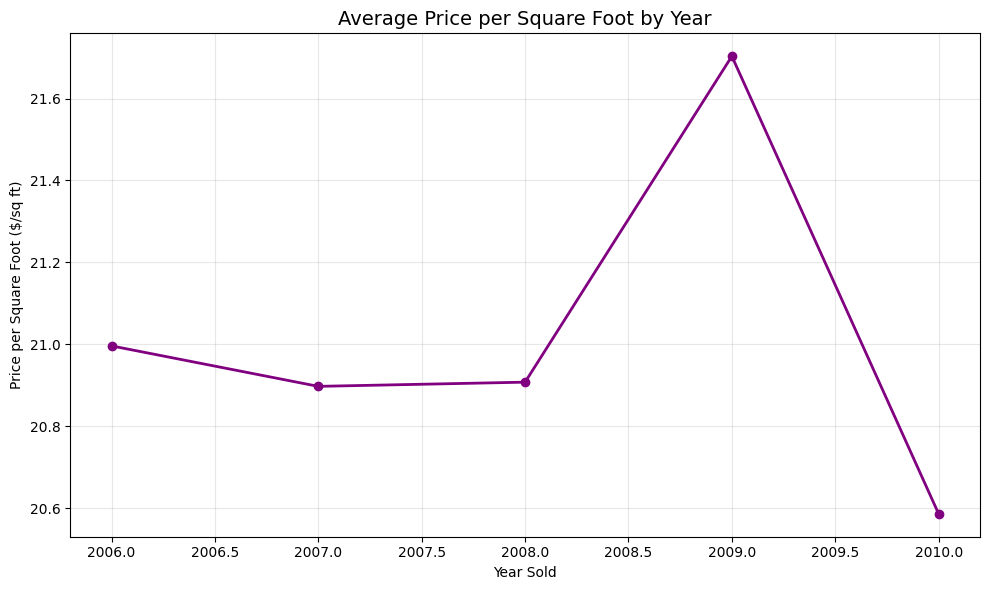

In [28]:
# 1. Group by sale year and compute average SalePrice
price_by_year = df.groupby('YrSold')['SalePrice'].mean().sort_index()

# 2. Count sales per year
sales_count_by_year = df.groupby('YrSold').size().sort_index()

# 3. Create subplots for better visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot 1: Average SalePrice by Year
ax1.bar(price_by_year.index, price_by_year.values, color='tab:blue', alpha=0.7)
ax1.set_ylabel('Average SalePrice ($)')
ax1.set_title('Average House Price by Year Sold', fontsize=14)
ax1.grid(True, alpha=0.3, axis='y')

# Highlight the year with highest price
max_price_year = price_by_year.idxmax()
max_price = price_by_year.max()
ax1.bar(max_price_year, max_price, color='red', alpha=0.7)
ax1.annotate(f'Highest: ${max_price:,.0f}',
             xy=(max_price_year, max_price),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center',
             fontweight='bold')

# Plot 2: Number of Sales by Year
ax2.bar(sales_count_by_year.index, sales_count_by_year.values, color='tab:green', alpha=0.7)
ax2.set_xlabel('Year Sold')
ax2.set_ylabel('Number of Sales')
ax2.set_title('Number of Houses Sold per Year', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')

# Highlight the year with most sales
max_sales_year = sales_count_by_year.idxmax()
max_sales = sales_count_by_year.max()
ax2.bar(max_sales_year, max_sales, color='red', alpha=0.7)
ax2.annotate(f'Highest: {max_sales} sales',
             xy=(max_sales_year, max_sales),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center',
             fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Optional: Create a separate plot for price per square foot
price_per_sqft = df.copy()
price_per_sqft['PricePerSqft'] = price_per_sqft['SalePrice'] / price_per_sqft['LotArea']
avg_price_per_sqft = price_per_sqft.groupby('YrSold')['PricePerSqft'].mean().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_sqft.index, avg_price_per_sqft.values, marker='o', linewidth=2, color='purple')
plt.title('Average Price per Square Foot by Year', fontsize=14)
plt.xlabel('Year Sold')
plt.ylabel('Price per Square Foot ($/sq ft)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()